In [92]:
import gymnasium as gym
import matplotlib.pyplot as plt

from src.Agent import PPOAgent
from src.OptimizerParameters import AdamOptimizerParameters

## 1) Testing architecture w. individual Policy and Value net:

In [130]:
# General Hyperparams
gamma = 0.99
lmbda = 0.925
epsilon = 0.2
num_policy_epochs = 10
num_value_epochs = 10
num_multihead_epochs = 5
smoothing_const = 1e-8
normalize_advantages = True
batch_size = 32
shuffle_batches = False
max_game_length = 500
architecture = "Individual Networks"
num_episodes = 40

# Optimizer Hyperparams
policy_optimizer_parameters = AdamOptimizerParameters(lr=0.005, betas=(0.9, 0.999), weight_decay=0)
value_optimizer_parameters = AdamOptimizerParameters(lr=0.005, betas=(0.9, 0.999), weight_decay=0)
multihead_optimizer_parameters = AdamOptimizerParameters(lr=0.005, betas=(0.9, 0.999), weight_decay=0)


rng_seed = 0
env = gym.make(id='CartPole-v1', max_episode_steps=max_game_length)

input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n


Agent = PPOAgent(env=env,
                 state_space_size=input_dim,
                 action_space_size=output_dim,
                 gamma=gamma,
                 lmbda=lmbda,
                 epsilon=epsilon,
                 smooting_const=smoothing_const,
                 normalize_advantages=normalize_advantages,
                 batch_size=batch_size,
                 shuffle_batches = shuffle_batches,
                 architecture=architecture,
                 seed=rng_seed)


In [131]:
# Trying to interact w. env. before training
Agent.play()

#########################################################################
# --- Survived for: 11 episodes, and earned a total reward of: 11.0 --- #
#########################################################################


In [ ]:
if architecture == "Individual Networks":
    avg_accumulated_rewards, avg_value_net_loss, avg_policy_net_loss = Agent.train(episodes=num_episodes,
                                                                                   num_policy_epochs=num_policy_epochs,
                                                                                   num_value_epochs=num_value_epochs,
                                                                                   policy_optimizer_params=policy_optimizer_parameters,
                                                                                   value_optimizer_params=value_optimizer_parameters)
elif architecture == "Multi Head Network":
    avg_accumulated_rewards, avg_multihead_net_loss = Agent.train(episodes=num_episodes,
                                                                  num_multihead_epochs=num_multihead_epochs,
                                                                  multihead_optimizer_params=multihead_optimizer_parameters)
else:
    pass
    

 25%|██▌       | 10/40 [00:02<00:10,  2.91it/s]

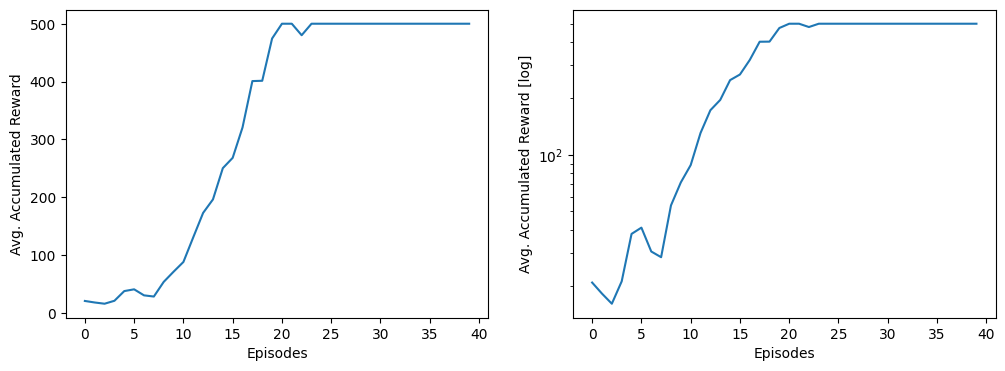

In [129]:

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot([e for e in range(len(avg_accumulated_rewards))], avg_accumulated_rewards)
ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Avg. Accumulated Reward')

ax[1].plot([e for e in range(len(avg_accumulated_rewards))], avg_accumulated_rewards)
ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Avg. Accumulated Reward [log]')
ax[1].set_yscale('log')
    

In [97]:
# Trying to interact w. env. after training
Agent.play()

###########################################################################
# --- Survived for: 500 episodes, and earned a total reward of: 500.0 --- #
###########################################################################


## 2) Testing architecture w. common backbone network w. Policy and Value heads:

In [98]:
architecture = "Multi Head Network"


Agent = PPOAgent(env=env,
                 state_space_size=input_dim,
                 action_space_size=output_dim,
                 gamma=gamma,
                 lmbda=lmbda,
                 epsilon=epsilon,
                 smooting_const=smoothing_const,
                 normalize_advantages=normalize_advantages,
                 batch_size=batch_size,
                 shuffle_batches = shuffle_batches,
                 architecture=architecture,
                 seed=rng_seed)

In [99]:
# Trying to interact w. env. before training
Agent.play()

#######################################################################
# --- Survived for: 8 episodes, and earned a total reward of: 8.0 --- #
#######################################################################


In [100]:
if architecture == "Individual Networks":
    avg_accumulated_rewards, avg_value_net_loss, avg_policy_net_loss = Agent.train(episodes=num_episodes,
                                                                                   num_policy_epochs=num_policy_epochs,
                                                                                   num_value_epochs=num_value_epochs,
                                                                                   policy_optimizer_params=policy_optimizer_parameters,
                                                                                   value_optimizer_params=value_optimizer_parameters)
elif architecture == "Multi Head Network":
    avg_accumulated_rewards, avg_multihead_net_loss = Agent.train(episodes=num_episodes,
                                                                  num_multihead_epochs=num_multihead_epochs,
                                                                  multihead_optimizer_params=multihead_optimizer_parameters)
else:
    pass
    

100%|██████████| 40/40 [00:26<00:00,  1.51it/s]


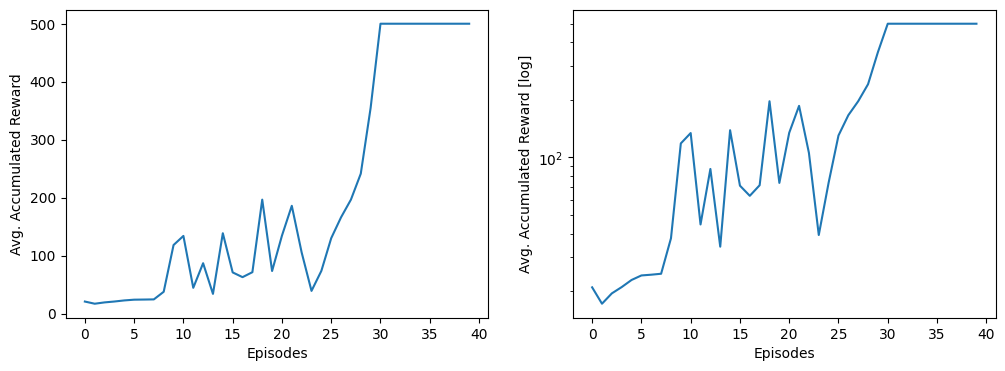

In [101]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot([e for e in range(len(avg_accumulated_rewards))], avg_accumulated_rewards)
ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Avg. Accumulated Reward')

ax[1].plot([e for e in range(len(avg_accumulated_rewards))], avg_accumulated_rewards)
ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Avg. Accumulated Reward [log]')
ax[1].set_yscale('log')
    

In [102]:
# Trying to interact w. env. after training
Agent.play()

###########################################################################
# --- Survived for: 500 episodes, and earned a total reward of: 500.0 --- #
###########################################################################


In [103]:
from tqdm import tqdm

for i in tqdm(range(num_episodes), disable= False):
    a = 2

100%|██████████| 40/40 [00:00<00:00, 998643.81it/s]
